# Graphs with NetworkX

- **Created by Andrés Segura Tinoco**
- **Created on Nov 27, 2019**

**NetworkX** is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks <a href="#link_one">[1]</a>. In this notebook we will use this library to analyze graphs.

In [1]:
# Load the Python libraries
import networkx as nx
import numpy as np
import math
import timeit

In [2]:
# Load Plotting libraries
import matplotlib.pyplot as plt

In [3]:
print('Networkx version:', nx.__version__)

Networkx version: 2.3


## 1. Graph or Undirected Simple Graph

A graph (sometimes called undirected graph for distinguishing from a directed graph) is a pair $ G = (V, E) $, where $V$ is a set whose elements are called vertices (singular: vertex), and $E$ is a set of two-sets (sets with two distinct elements) of vertices, whose elements are called edges (sometimes links or lines). <a href="#link_two">[2]</a>

The vertices $u$ and $v$ of an edge $ \{ u, v \} $ are called the endpoints of the edge. The edge is said to join $u$ and $v$ and to be incident on $u$ and $v$. A vertex may not belong to any edge.

A multigraph is a generalization that allows multiple edges adjacent to the same pair of vertices. In some texts, multigraphs are simply called graphs.

In [4]:
# Create an empty Undirected Simple Graph (USG)
usg = nx.Graph()

In [5]:
# Add nodes/vertices
nodes_list = [1, 2, 3, 4, 5]
usg.add_nodes_from(nodes_list)
print(usg.nodes())

[1, 2, 3, 4, 5]


In [6]:
# Add edges
edges_list = [(1, 2), (1, 3), (1, 4), (1, 5), (3, 2), (4, 2), (4, 3), (5, 4)]
usg.add_edges_from(edges_list)
print(usg.edges())

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 4), (4, 5)]


#### Graph density

In [7]:
# Function that calculates the graph density
def get_graph_density(g):
    n_nodes = len(g.nodes())
    n_edges = len(g.edges())
    print('n_nodes:', n_nodes, ', n_edges:', n_edges)
    
    if nx.is_directed(g):
        density = n_edges / (n_nodes * (n_nodes - 1))
    else:
        density = 2 * n_edges / (n_nodes * (n_nodes - 1))
    
    return density

In [8]:
# Calculate the graph density
density = get_graph_density(usg)
print('graph density:', density)

n_nodes: 5 , n_edges: 8
graph density: 0.8


#### Vertex degree

In [9]:
# Degree of node 1 = δ(1)
usg.degree[1]

4

In [10]:
# Get neighbors of node 1
list(usg.neighbors(1))

[2, 3, 4, 5]

#### Adjacency matrix

In [11]:
# Calculate the adjacency between the nodes
adj_mtx = nx.adjacency_matrix(usg).todense()
adj_mtx

matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 0],
        [1, 1, 0, 1, 0],
        [1, 1, 1, 0, 1],
        [1, 0, 0, 1, 0]], dtype=int32)

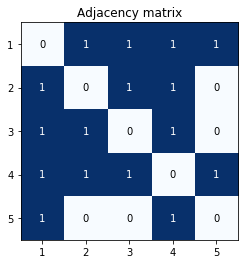

In [12]:
# Plotting the Adjacency matrix
fig, ax = plt.subplots()
ax.imshow(adj_mtx, cmap="Blues")
ax.set_xticks(np.arange(len(nodes_list)))
ax.set_yticks(np.arange(len(nodes_list)))
ax.set_xticklabels(nodes_list)
ax.set_yticklabels(nodes_list)

for i in range(len(nodes_list)):
    for j in range(len(nodes_list)):
        text_color = 'black' if adj_mtx[i, j] == 0 else 'white'
        text = ax.text(j, i, adj_mtx[i, j], ha="center", va="center", color=text_color)

ax.set_title("Adjacency matrix", fontsize=12)
plt.show()

#### Incidence matrix

In [13]:
# Calculate the incidence of the edges on the nodes
inc_mtx = nx.incidence_matrix(usg).todense()
inc_mtx

matrix([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 1., 0., 0.],
        [0., 1., 0., 0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 0., 0., 0., 1.]])

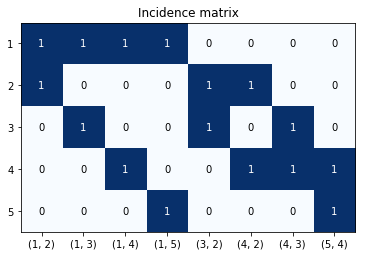

In [14]:
# Plotting the Incidence matrix
fig, ax = plt.subplots()
ax.imshow(inc_mtx, cmap="Blues")
ax.set_xticks(np.arange(len(edges_list)))
ax.set_yticks(np.arange(len(nodes_list)))
ax.set_xticklabels(edges_list)
ax.set_yticklabels(nodes_list)

for i in range(len(nodes_list)):
    for j in range(len(edges_list)):
        text_color = 'black' if inc_mtx[i, j] == 0 else 'white'
        text = ax.text(j, i, int(inc_mtx[i, j]), ha="center", va="center", color=text_color)

ax.set_title("Incidence matrix", fontsize=12)
plt.show()

#### Plotting Undirected Simple Graph

In [15]:
# Get nodes positions with spring layout
pos = nx.layout.spring_layout(usg)
pos

{1: array([-0.35081762,  0.01601643]),
 2: array([-0.12336853, -0.74777874]),
 3: array([ 0.56117937, -0.50521389]),
 4: array([0.26463242, 0.23697619]),
 5: array([-0.35162564,  1.        ])}

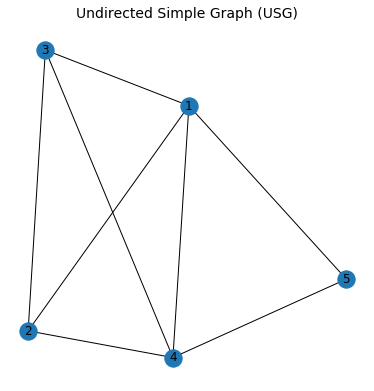

In [16]:
# Plot Undirected Simple Graph (free format)
plt.rcParams["figure.figsize"] = [5, 5]
nx.draw(usg, with_labels=True)
plt.title('Undirected Simple Graph (USG)', fontsize=14)
plt.axis('off')
plt.show()

## 2. Graph Traversal

In computer science, graph traversal (also known as graph search) refers to the process of visiting (checking and/or updating) each vertex in a graph. Such traversals are classified by the order in which the vertices are visited. Tree traversal is a special case of graph traversal. <a href="#link_three">[3]</a>

Given the following undirected graph:

In [17]:
# Create an empty Undirected Weighted Graph (UWG)
usg = nx.Graph()

In [18]:
# Add nodes
nodes_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
usg.add_nodes_from(nodes_list)

In [19]:
# Add weighted edges
edges_list = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 5), (2, 6), (3, 6), (4, 7), (4, 8), (5, 6), (5, 9), (7, 8)]
usg.add_edges_from(edges_list)

In [20]:
# We then set the coordinates of each node
usg.node[1]['pos'] = (2, 2)
usg.node[2]['pos'] = (0, 0)
usg.node[3]['pos'] = (2, 0)
usg.node[4]['pos'] = (4, 0)
usg.node[5]['pos'] = (0,-2)
usg.node[6]['pos'] = (2,-2)
usg.node[7]['pos'] = (4,-2)
usg.node[8]['pos'] = (6,-2)
usg.node[9]['pos'] = (0,-4)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(usg, 'pos')

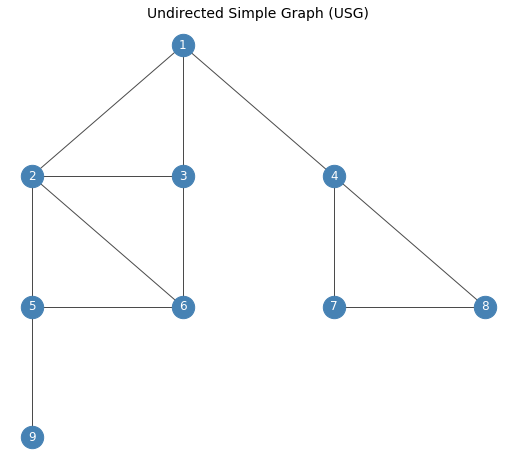

In [21]:
# Nodes labels
labels = {}
for n in usg.nodes():
    labels[n] = n
    
# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [9, 8]
nx.draw_networkx_nodes(usg, pos, nodelist=usg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(usg, pos, edgelist=usg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_labels(usg, pos, labels, font_size=12, font_color='w')
plt.title('Undirected Simple Graph (USG)', fontsize=14)
plt.axis('off')
plt.show()

### 2.1. Breadth-first search

In [22]:
# Save the node and mark it as visited
def add_node(g, v, v_visited, verbose):
    v_visited.append(v)
    if verbose:
        print('   added vertex:', v, ', available neighbors:', list(set(g.neighbors(v)) - set(v_visited)))

In [23]:
# Linear function that performs the search
def breadth_traversal(g, v, v_visited, verbose):
    
    # Add the vertex
    v_visited.append(v)
    queue = [v]
            
    while len(queue) > 0:
        u = queue.pop(0)
        
        for w in g.neighbors(u):
            if not w in v_visited:
                add_node(g, w, v_visited, verbose)
                queue.append(w)

# Function that performs a breadth-first search
def bfs(g, verbose=False):
    start_time = timeit.default_timer()
    v_visited = []
    
    if verbose:
        print('>> breadth-first search - n_vertices:', len(g.nodes()), ', n_edges:', len(g.edges()))
    
    for v in g.nodes():
        if not v in v_visited:
            breadth_traversal(g, v, v_visited, verbose)
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return v_visited

In [24]:
# Run the breadth-first search on the current undirected graph
bfs(usg, True)

>> breadth-first search - n_vertices: 9 , n_edges: 12
   added vertex: 2 , available neighbors: [3, 5, 6]
   added vertex: 3 , available neighbors: [6]
   added vertex: 4 , available neighbors: [8, 7]
   added vertex: 5 , available neighbors: [9, 6]
   added vertex: 6 , available neighbors: []
   added vertex: 7 , available neighbors: [8]
   added vertex: 8 , available neighbors: []
   added vertex: 9 , available neighbors: []
>> elapsed time 7.2572 ms


[1, 2, 3, 4, 5, 6, 7, 8, 9]

### 2.2. Depth-first search

In [25]:
# Recursive function that performs the search
def depth_traversal(g, v, v_visited, verbose):
    
    # Add the vertex
    add_node(g, v, v_visited, verbose)
    
    for w in g.neighbors(v):
        if not w in v_visited:
            depth_traversal(g, w, v_visited, verbose)

# Function that performs a depth-first search
def dfs(g, verbose=False):
    start_time = timeit.default_timer()
    v_visited = []
    
    if verbose:
        print('>> depth-first search - n_vertices:', len(g.nodes()), ', n_edges:', len(g.edges()))
    
    for v in g.nodes():
        if not v in v_visited:
            depth_traversal(g, v, v_visited, verbose)
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return v_visited

In [26]:
# Run the depth-first search (recursive) on the current undirected graph
dfs(usg, True)

>> depth-first search - n_vertices: 9 , n_edges: 12
   added vertex: 1 , available neighbors: [2, 3, 4]
   added vertex: 2 , available neighbors: [3, 5, 6]
   added vertex: 3 , available neighbors: [6]
   added vertex: 6 , available neighbors: [5]
   added vertex: 5 , available neighbors: [9]
   added vertex: 9 , available neighbors: []
   added vertex: 4 , available neighbors: [8, 7]
   added vertex: 7 , available neighbors: [8]
   added vertex: 8 , available neighbors: []
>> elapsed time 11.670199999999992 ms


[1, 2, 3, 6, 5, 9, 4, 7, 8]

## 3. Minimum Spanning Tree of an Undirected Weighted Graph

A minimum spanning tree <b>(MST)</b> or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph <b>(UWG)</b> that connects all the vertices together, without any cycles and with the minimum possible total edge weight. <a href="#link_four">[4]</a>

If the weights are positive, then a minimum spanning tree is in fact a minimum-cost subgraph connecting all vertices, since subgraphs containing cycles necessarily have more total weight.

In [27]:
# Create an empty Undirected Weighted Graph (UWG)
uwg = nx.Graph()

In [28]:
# Add nodes
nodes_list = [1, 2, 3, 4, 5, 6, 7]
uwg.add_nodes_from(nodes_list)

In [29]:
# Add weighted edges
edges_list = [(1, 2, 1), (1, 4, 4), (2, 3, 2), (2, 4, 6), (2, 5, 4), (3, 5, 5), 
              (3, 6, 6), (4, 5, 3), (4, 7, 4), (5, 6, 8), (5, 7, 7), (6, 7, 3)]
uwg.add_weighted_edges_from(edges_list)

### 3.1. The MST with the Prim algorithm

In [30]:
# Calculate a minimum spanning tree of an undirected weighted graph with the Prim algorithm
mst = nx.minimum_spanning_tree(uwg, algorithm='prim')
print(sorted(mst.edges(data=True)))

[(1, 2, {'weight': 1}), (1, 4, {'weight': 4}), (2, 3, {'weight': 2}), (4, 5, {'weight': 3}), (4, 7, {'weight': 4}), (6, 7, {'weight': 3})]


### 3.2. The MST with the Kruskal algorithm from Scratch

Below, the Kruskal's minimum spanning tree algorithm with utility functions for sets union.

In [31]:
# A utility function to find set of an element n
def find(s, n):
    if s[n] == n:
        return n
    return find(s, s[n])

# A function that does union of two sets of u and v (uses union by rank)
def union(s, r, u, v):
    comp_u = find(s, u)
    comp_v = find(s, v)
    
    if r[comp_u] < r[comp_v]:
        s[comp_u] = comp_v
    elif r[comp_u] > r[comp_v]:
        s[comp_v] = comp_u
    else:
        s[comp_v] = comp_u
        r[comp_u] += 1

In [32]:
# Find the minimum spanning tree into the graph
def get_mst_kruskal(uwg, verbose=False):
    start_time = timeit.default_timer()
    min_tree = []
    
    # Sort all the edges in non-decreasing order of their weight
    edges = uwg.edges(data=True)
    edges = sorted(edges, key=lambda t: t[2].get('weight', 1))
    n_edges = len(edges)
    n_nodes = len(uwg.nodes())
    
    # Create N subsets with single elements
    s_tree = dict()
    rank = dict()
    for node in uwg.nodes():
        s_tree[node] = node
        rank[node] = 0
    
    if verbose:
        print('>> n_nodes:', n_nodes, ', n_edges:', n_edges)
    
    ix = 0
    while len(min_tree) < n_nodes - 1 and ix < n_edges:
        u, v, w = edges[ix]
        comp_u = find(s_tree, u)
        comp_v = find(s_tree, v)
        if verbose:
            print('>> ix:', ix, ', edge:', edges[ix])
        
        if comp_u != comp_v:
            union(s_tree, rank, comp_u, comp_v)
            min_tree.append(edges[ix])
            
            if verbose:
                print('   added edge in comp_u:', comp_u, ', comp_v:', comp_v)
        else:
            print('   rejected edge')
        ix += 1
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return min_tree

In [33]:
# Calculate a minimum spanning tree from scratch with the Prim algorithm
mst_edges = get_mst_kruskal(uwg, True)
print(sorted(mst_edges))

>> n_nodes: 7 , n_edges: 12
>> ix: 0 , edge: (1, 2, {'weight': 1})
   added edge in comp_u: 1 , comp_v: 2
>> ix: 1 , edge: (2, 3, {'weight': 2})
   added edge in comp_u: 1 , comp_v: 3
>> ix: 2 , edge: (4, 5, {'weight': 3})
   added edge in comp_u: 4 , comp_v: 5
>> ix: 3 , edge: (6, 7, {'weight': 3})
   added edge in comp_u: 6 , comp_v: 7
>> ix: 4 , edge: (1, 4, {'weight': 4})
   added edge in comp_u: 1 , comp_v: 4
>> ix: 5 , edge: (2, 5, {'weight': 4})
   rejected edge
>> ix: 6 , edge: (4, 7, {'weight': 4})
   added edge in comp_u: 1 , comp_v: 6
>> elapsed time 17.794900000000002 ms
[(1, 2, {'weight': 1}), (1, 4, {'weight': 4}), (2, 3, {'weight': 2}), (4, 5, {'weight': 3}), (4, 7, {'weight': 4}), (6, 7, {'weight': 3})]


#### Plotting Minimum Spanning Tree of an UWG

In [34]:
# We then set the coordinates of each node
uwg.node[1]['pos'] = (0, 2)
uwg.node[2]['pos'] = (3, 2)
uwg.node[3]['pos'] = (6, 2)
uwg.node[4]['pos'] = (0, 0)
uwg.node[5]['pos'] = (3, 0)
uwg.node[6]['pos'] = (6, 0)
uwg.node[7]['pos'] = (3,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(uwg, 'pos')

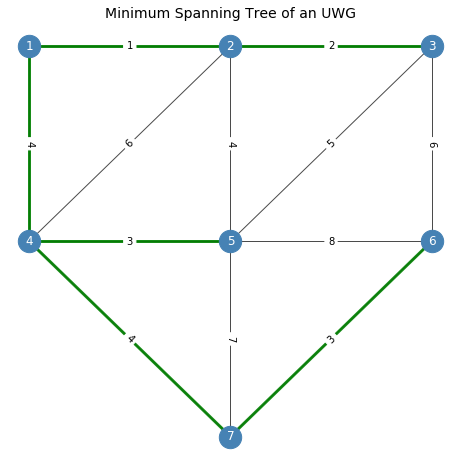

In [35]:
# Nodes labels
labels = {}
for n in uwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for u, v, w in uwg.edges(data=True):
    weights[(u, v)] = w['weight']
    
# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(uwg, pos, nodelist=uwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(uwg, pos, edgelist=uwg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_edges(uwg, pos, edgelist=mst_edges,   width=3, alpha=0.9, edge_color='green')
nx.draw_networkx_labels(uwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(uwg, pos, edge_labels=weights, font_color='black')
plt.title('Minimum Spanning Tree of an UWG', fontsize=14)
plt.axis('off')
plt.show()

## 4. Eulerian Circuit and Path

In graph theory, an **Eulerian path** is a trail in a finite graph that visits every edge exactly once (allowing for revisiting vertices). Similarly, an **Eulerian circuit** or Eulerian cycle is an Eulerian trail that starts and ends on the same vertex. They were first discussed by Leonhard Euler while solving the famous Seven Bridges of Königsberg problem in 1736. <a href="#link_five">[5]</a>

In [36]:
# Create an empty Undirected Multi Graph (UMG)
umg = nx.Graph()

In [37]:
# Add nodes/vertices
umg.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f'])
print(umg.nodes())

['a', 'b', 'c', 'd', 'e', 'f']


In [38]:
# Add edges
umg.add_edges_from([('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('b', 'e'), 
                    ('c', 'd'), ('c', 'e'), ('d', 'e'), ('d', 'f'), ('e', 'f')])
print(umg.edges())

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'), ('d', 'e'), ('d', 'f'), ('e', 'f')]


In [39]:
# Function that returns if the graph is Eulerian
def is_eulerian(g, verbose=False):
    eulerian = True
    odd = 0
    
    # Count vertices with odd degree 
    for n in umg.nodes():
        if int(umg.degree[n]) % 2 != 0:
            odd += 1
    
    if verbose:
        if odd == 0:
            print('>> The graph has a Eulerian circuit')
        elif odd == 2:
            print('>> The graph has a Eulerian path')
        else:
            print('>> The graph dont have a Eulerian circuit')
    
    return eulerian

In [40]:
# Get the next adjacent node
def find_adjacent_node(g, node, verbose=False):
    adj_node = None
    neighbors = list(g.neighbors(node))
    
    if len(neighbors) > 0:
        adj_node = neighbors[0]
        
        if verbose:
            print('   curr node:', node, ', adjacent nodes:', neighbors)
    
    return adj_node

In [41]:
# Build an eulerian circuit of an Undirected Multigraph
def get_eulerian_circuit(umg, verbose=False):
    start_time = timeit.default_timer()
    
    g = umg.copy()
    circuit = []
    
    # Validation
    if is_eulerian(g, verbose):
        curr_node = list(g.nodes())[0]
        stack = [curr_node]
        
        # Until stack is empty
        while len(stack) > 0:
            curr_node = stack[len(stack) - 1]
            
            if g.degree[curr_node] == 0:
                circuit.append(curr_node)
                stack.pop()
                
                if verbose:
                    print('   added node:', curr_node)
            else:
                # Find any edge coming out of u
                adj_node = find_adjacent_node(g, curr_node, verbose)
                
                if not adj_node is None:
                    edge = (curr_node, adj_node)
                    g.remove_edge(*edge)
                    stack.append(adj_node)
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return circuit

In [42]:
# Get Eulerian circuit (if exists)
e_circuit = get_eulerian_circuit(umg, True)
e_circuit

>> The graph has a Eulerian circuit
   curr node: a , adjacent nodes: ['b', 'c']
   curr node: b , adjacent nodes: ['c', 'd', 'e']
   curr node: c , adjacent nodes: ['a', 'd', 'e']
   added node: a
   curr node: c , adjacent nodes: ['d', 'e']
   curr node: d , adjacent nodes: ['b', 'e', 'f']
   curr node: b , adjacent nodes: ['e']
   curr node: e , adjacent nodes: ['c', 'd', 'f']
   added node: c
   curr node: e , adjacent nodes: ['d', 'f']
   curr node: d , adjacent nodes: ['f']
   curr node: f , adjacent nodes: ['e']
   added node: e
   added node: f
   added node: d
   added node: e
   added node: b
   added node: d
   added node: c
   added node: b
   added node: a
>> elapsed time 36.90530000000003 ms


['a', 'c', 'e', 'f', 'd', 'e', 'b', 'd', 'c', 'b', 'a']

#### Plotting Eulerian Circuit

In [43]:
# Create a new DiGraph (Eulerian Circuit Graph)
ecg = nx.DiGraph()
ecg.add_nodes_from(umg.nodes())

# We then set the coordinates of each node
ecg.node['a']['pos'] = (0, 0)
ecg.node['b']['pos'] = (3, 2)
ecg.node['c']['pos'] = (3, -2)
ecg.node['d']['pos'] = (6, 2)
ecg.node['e']['pos'] = (6,-2)
ecg.node['f']['pos'] = (9, 0)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(ecg, 'pos')

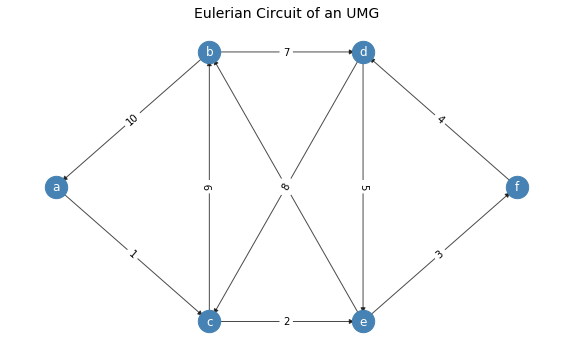

In [44]:
# Nodes labels
labels = {}
for n in ecg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for i in range(len(e_circuit) - 1):
    u, v = e_circuit[i], e_circuit[i+1]
    weights[(u, v)] = (i + 1)
    ecg.add_edge(u, v)
    
# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [10, 6]
nx.draw_networkx_nodes(ecg, pos, nodelist=ecg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(ecg, pos, edgelist=ecg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_labels(ecg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(ecg, pos, edge_labels=weights, font_color='black')
plt.title('Eulerian Circuit of an UMG', fontsize=14)
plt.axis('off')
plt.show()

 ## 5. Shortest Path of a Directed Weighted Graph

A directed graph or digraph is a graph in which edges have orientations <a href="#link_six">[6]</a>. In formal terms, a directed graph is an ordered pair $ G = \langle V, E \rangle $ where:

- $V$ is a set whose elements are called vertices, nodes or points.
- $E$ is a set of ordered pairs of vertices, called arrows, directed edges, directed arcs or directed lines.

In [45]:
# Create an empty Directed Weighted Graph (DWG)
dwg = nx.DiGraph()

In [46]:
# Add nodes
nodes_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
dwg.add_nodes_from(nodes_list)

In [47]:
# Add weighted edges
edges_list = [(1, 2, 4), (1, 3, 5), (1, 4, 1), (2, 5, 10), (2, 7, 9), (3, 5, 6), (3, 6, 5), 
              (4, 6, 11), (4, 8, 2), (5, 9, 4), (6, 9, 3), (7, 9, 5), (8, 9, 3)]
dwg.add_weighted_edges_from(edges_list)

In [48]:
# Calculate the graph density
density = get_graph_density(dwg)
print('Graph density:', density)

n_nodes: 9 , n_edges: 13
Graph density: 0.18055555555555555


### 5.1. The Shortest Path with the Dijkstra algorithm

Given a directed graph $ G = \langle V, E \rangle $, the time complexity of Dijkstra's algorithm is $ \Theta (V^2) $ but with min-priority queue it drops down to $ \Theta((E + V) \thinspace log{V}) $. <a href="#link_seven">[7]</a>

In [49]:
# Using Dijkstra algorithm
source = 1
target = 9
sp = nx.dijkstra_path(dwg, source, target)
sp

[1, 4, 8, 9]

In [50]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path_length(dwg, source, target)
sp

6

### 5.2. The Dijkstra algorithm from Scratch

Below, a detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights is shown.

In [51]:
# Returns the node with a minimum own distance
def get_min_node(nodes, weights):
    min_node = -1
    min_weigth = math.inf
    
    for n in nodes:
        w = weights[n]
        if w < min_weigth:
            min_node = n
            min_weigth = w
    
    return min_node

In [52]:
# A detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights 
def get_dijkstra_dist(graph, source, verbose=False):
    nodes = list(graph.nodes())
    edges = graph.edges()
    
    # Init distances
    dists = dict()
    for n in nodes:
        dists[n] = (0 if n == source else math.inf)
    paths = dict()
    for n in nodes:
        paths[n] = source
    
    # Greedy cycle
    v = source
    while len(nodes) > 1:        
        nodes.remove(v)
        if verbose:
            print('>> curr node:', v, ', len:', len(nodes))
        
        # Update weights
        for w in nodes:
            if (v, w) in edges:
                if dists[w] > dists[v] + edges[v, w]['weight']:
                    dists[w] = dists[v] + edges[v, w]['weight']
                    paths[w] = v
                    if verbose:
                        print('   v:', v, ', w:', w, ', weigth:', dists[w])
        
        # Get the node with a minimum own distance
        v = get_min_node(nodes, dists)
        if v == -1:
            break
        
    return { 'distances': dists, 'paths': paths }

In [53]:
# Show shortes path from source node to target node
def get_shortes_path(dwg, source, target, verbose=False):
    
    # Validation
    if not source in dwg.nodes() or not target in dwg.nodes():
        print('Both the source and the target must exist in the graph.')
        return {}
    
    start_time = timeit.default_timer()
    
    # Get the distance from 'source' to the other nodes
    sol = get_dijkstra_dist(dwg, source, verbose)
    paths = sol['paths']
    
    # Get shortest path from 'source' to 'target'
    ix = target
    path = [ix]
    while ix != source:
        ix = paths[ix]
        path.append(ix)
    path.reverse()
    
    weight = sol['distances'][target]
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return { 'path': path, 'weight': weight }

In [54]:
# Example of the shortes path calculation from '1' to '9'
sp_sol = get_shortes_path(dwg, source, target, True)
sp_sol

>> curr node: 1 , len: 8
   v: 1 , w: 2 , weigth: 4
   v: 1 , w: 3 , weigth: 5
   v: 1 , w: 4 , weigth: 1
>> curr node: 4 , len: 7
   v: 4 , w: 6 , weigth: 12
   v: 4 , w: 8 , weigth: 3
>> curr node: 8 , len: 6
   v: 8 , w: 9 , weigth: 6
>> curr node: 2 , len: 5
   v: 2 , w: 5 , weigth: 14
   v: 2 , w: 7 , weigth: 13
>> curr node: 3 , len: 4
   v: 3 , w: 5 , weigth: 11
   v: 3 , w: 6 , weigth: 10
>> curr node: 9 , len: 3
>> curr node: 6 , len: 2
>> curr node: 5 , len: 1
>> elapsed time 8.981099999999742 ms


{'path': [1, 4, 8, 9], 'weight': 6}

#### Plotting Shortest Path of a DWG

In [55]:
# We then set the coordinates of each node
dwg.node[1]['pos'] = (0, 0)
dwg.node[2]['pos'] = (3, 2.5)
dwg.node[3]['pos'] = (3, 0)
dwg.node[4]['pos'] = (3, -2.5)
dwg.node[5]['pos'] = (6, 3)
dwg.node[6]['pos'] = (6, 1)
dwg.node[7]['pos'] = (6,-1)
dwg.node[8]['pos'] = (6,-3)
dwg.node[9]['pos'] = (9, 0)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(dwg, 'pos')

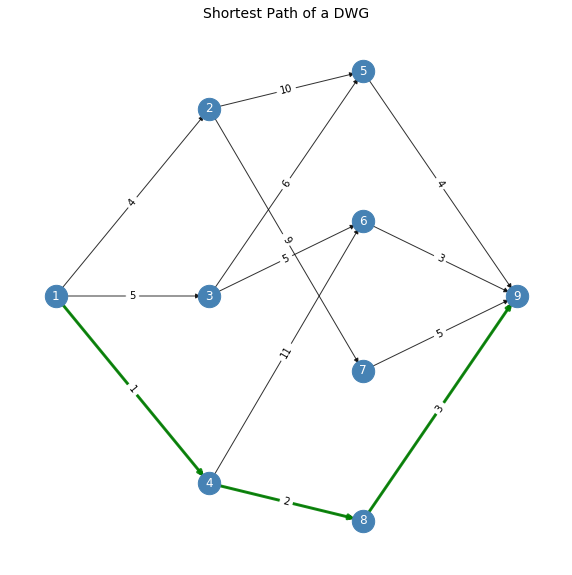

In [56]:
# Nodes labels
labels = {}
for n in dwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for u, v, w in dwg.edges(data=True):
    weights[(u, v)] = w['weight']

sp_edges = []
for i in range(len(sp_sol['path']) - 1):
    e = (sp_sol['path'][i], sp_sol['path'][i+1])
    sp_edges.append(e)

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [10, 10]
nx.draw_networkx_nodes(dwg, pos, nodelist=dwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(dwg, pos, edgelist=dwg.edges(), width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_edges(dwg, pos, edgelist=sp_edges,    width=3, alpha=0.9, edge_color='green')
nx.draw_networkx_labels(dwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(dwg, pos, edge_labels=weights, font_color='black')
plt.title('Shortest Path of a DWG', fontsize=14)
plt.axis('off')
plt.show()

## 6. All-Pairs Shortest Path

The **all-pairs shortest path** problem is the determination of the shortest graph distances between every pair of vertices in a given graph. The problem can be solved using $n$ applications of Dijkstra's algorithm or all at once using the Floyd-Warshall algorithm. <a href="#link_eight">[8]</a>

In [57]:
# Create an empty Directed Weighted Graph (DWG)
dwg = nx.DiGraph()

In [58]:
# Add nodes
nodes_list = [1, 2, 3, 4, 5]
dwg.add_nodes_from(nodes_list)

In [59]:
# Add weighted edges
edges_list = [(1, 2, 50), (1, 3, 30), (1, 4, 100), (1, 5, 10), (3, 2, 5), (4, 2, 20), (4, 3, 50), (5, 4, 10)]
dwg.add_weighted_edges_from(edges_list)

In [60]:
# We then set the coordinates of each node
dwg.node[1]['pos'] = (0, 0)
dwg.node[2]['pos'] = (2, 2)
dwg.node[3]['pos'] = (2,-2)
dwg.node[4]['pos'] = (5, 2)
dwg.node[5]['pos'] = (5,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(dwg, 'pos')

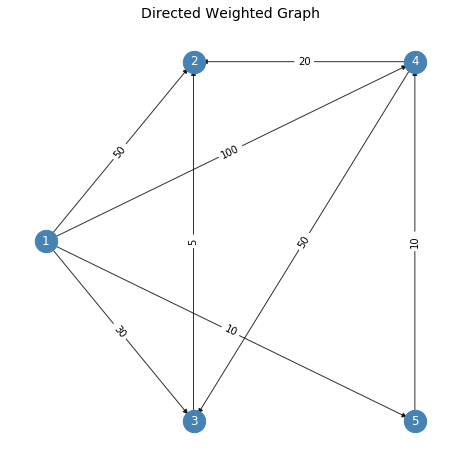

In [61]:
# Nodes labels
labels = {}
for n in dwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for u, v, w in dwg.edges(data=True):
    weights[(u, v)] = w['weight']
    
# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(dwg, pos, nodelist=dwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(dwg, pos, edgelist=dwg.edges(), width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(dwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(dwg, pos, edge_labels=weights, font_color='black')
plt.title('Directed Weighted Graph', fontsize=14)
plt.axis('off')
plt.show()

### 6.1. Floyd-Warshall algorithm

The **Floyd–Warshall** algorithm is a method for finding shortest paths in a weighted graph with positive or negative edge weights (but with no negative cycles).

The Floyd–Warshall algorithm compares all possible paths through the graph between each pair of vertices. It is able to do this with $ \Theta (|V|^{3}) $ comparisons in a graph.

In [62]:
# Algorithm for finding shortest paths in a directed weighted graph
def floyd_warshall_paths(g, verbose=False):
    start_time = timeit.default_timer()
    
    edges = g.edges(data=True)
    vertices = list(g.nodes())
    n_vertices = len(vertices)
    
    # Init dist matrix
    dist = [[math.inf for j in range(n_vertices)] for i in range(n_vertices)]
    path = [[None for j in range(n_vertices)] for i in range(n_vertices)]
    
    for (u, v, w) in edges:
        u = u - 1
        v = v - 1
        w = w['weight']
        dist[u][v] = w
        path[u][v] = v + 1
    
    for v in range(n_vertices):
        dist[v][v] = 0
        path[v][v] = v + 1
    
    if verbose:
        print('>> run floyd-warshall algorithm')
        
    for k in range(n_vertices):
        for i in range(n_vertices):
            for j in range(n_vertices):
                
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    path[i][j] = path[i][k]
                    
                    if verbose:
                        print('   update edge (', i, ',', j, '), value:', dist[i][j])
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    # Return nodes and dist matrix
    return {'nodes': vertices, 'dist': dist, 'path': path}

In [63]:
# Calculate the Floyd-Warshall paths
sol = floyd_warshall_paths(dwg, True)

>> run floyd-warshall algorithm
   update edge ( 0 , 1 ), value: 35
   update edge ( 4 , 1 ), value: 30
   update edge ( 4 , 2 ), value: 60
   update edge ( 0 , 3 ), value: 20
>> elapsed time 4.674200000000184 ms


In [64]:
# Show Floyd-Warshall results
'nodes:', sol['nodes']

('nodes:', [1, 2, 3, 4, 5])

In [65]:
print('dist matrix:')
sol['dist']

dist matrix:


[[0, 35, 30, 20, 10],
 [inf, 0, inf, inf, inf],
 [inf, 5, 0, inf, inf],
 [inf, 20, 50, 0, inf],
 [inf, 30, 60, 10, 0]]

In [66]:
print('path matrix:')
sol['path']

path matrix:


[[1, 3, 3, 5, 5],
 [None, 2, None, None, None],
 [None, 2, 3, None, None],
 [None, 2, 3, 4, None],
 [None, 4, 4, 4, 5]]

In [67]:
# Returns the shortest path from a Floyd-Warshall distance matrix
def get_shortest_path(paths, u, v):
    
    # Validation
    if paths[u - 1][v - 1] is None:
        return []
    
    # Build the shortest path
    path = [u]
    while u != v:
        u = paths[u - 1][v - 1]
        path.append(u)
    
    return path

In [68]:
# Show the shortes path from '1' to '2'
source = 1
target = 2
get_shortest_path(sol['path'], source, target)

[1, 3, 2]

## 7. Graph Coloring

In graph theory, graph coloring is a special case of graph labeling; it is an assignment of labels traditionally called "colors" to elements of a graph subject to certain constraints. In its simplest form, it is a way of coloring the vertices of a graph such that no two adjacent vertices are of the same color; this is called a vertex coloring. <a href="#link_nine">[9]</a>

#### Four color theorem
In mathematics, the four color theorem, or the four color map theorem, states that, given any separation of a plane (**without crossings**) into contiguous regions, producing a figure called a map, no more than four colors are required to color the regions of the map so that no two adjacent regions have the same color. Adjacent means that two regions share a common boundary curve segment, not merely a corner where three or more regions meet. It was the first major theorem to be proved using a computer. <a href="#link_ten">[10]</a>

Given the following undirected plane graph of South America, color it using the Welsh-Powell algorithm, to validate the four color theorem.

In [69]:
# Create an empty Undirected Plane Graph (UPG)
upg = nx.Graph()

In [70]:
# Node names
nodes_name = {1:'Argentina', 2:'Bolivia', 3:'Brasil', 4:'Chile', 5:'Colombia', 6:'Ecuador', 7:'Guyana',
              8:'G.Francesa', 9:'Panamá', 10:'Paraguay', 11:'Perú', 12:'Surinam', 13:'Uruguay', 14:'Venezuela'}

# Add nodes
upg.add_nodes_from(nodes_name.keys())

In [71]:
# Add weighted edges
edges_list = [(1, 2), (1, 3), (1, 4), (1, 10), (1, 13), (2, 3), (2, 4), (2, 10), (2, 11), (3, 5), (3, 7), (3, 8), (3, 10), 
              (3, 11), (3, 12), (3, 13), (3, 14), (4, 11), (5, 6), (5, 9), (5, 11), (5, 14), (6, 11), (7, 12), (7, 14), (8, 12)]
upg.add_edges_from(edges_list)

### Welsh-Powell Algorithm:

- Find the degree of each vertex
- List the vertices in order of descending degree
- Colour the first vertex in the list
- Go down the sorted list and color every vertex not connected to the colored vertices above the same color then cross out all colored vertices in the list
- Repeat the process on the uncolored vertices with a new color-always working in descending order of degree until all vertices are colored

In [72]:
# Function to color graphs using the Welsh-Powell algorithm
def graph_coloring_welsh_powell(g, verbose=False):
    start_time = timeit.default_timer()
    
    colors = dict()
    vtx_degree = dict()
    palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
    
    # Find the degree of each vertex
    for v in g.nodes():
        vtx_degree[v] = len(list(g.neighbors(v)))
    
    # List the vertices in order of descending degree
    vtx_sort = [k for k in sorted(vtx_degree, key=vtx_degree.get, reverse=True)]
    if verbose:
        print(vtx_sort)
    
    # Colour the vertices in the list
    c_ix = -1
    while len(vtx_sort) > 0 and c_ix < len(palette):
        c_ix += 1
        if verbose:
            print(' current color:', palette[c_ix], ', n vertices:', len(vtx_sort))
        
        # Go down the sorted list and color every vertex not connected to the colored vertices
        colored_nodes = []
        for v in vtx_sort:
            if len(set(g.neighbors(v)).intersection(set(colored_nodes))) == 0:
                colors[v] = palette[c_ix]
                colored_nodes.append(v)
                
                if verbose:
                    print('  ', v, '->', palette[c_ix], '->', list(g.neighbors(v)))
        
        # Remove colored nodes
        for v in colored_nodes:
            if v in vtx_sort:
                vtx_sort.remove(v)
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print(' the chromatic number is:', (c_ix + 1))
        print('>> elapsed time', elapsed, 'ms')
        
    return colors

In [73]:
# Get colors by vertices
vtx_colors = graph_coloring_welsh_powell(upg, True)

[3, 1, 2, 5, 11, 4, 7, 10, 12, 14, 6, 8, 13, 9]
 current color: #1f77b4 , n vertices: 14
   3 -> #1f77b4 -> [1, 2, 5, 7, 8, 10, 11, 12, 13, 14]
   4 -> #1f77b4 -> [1, 2, 11]
   6 -> #1f77b4 -> [5, 11]
   9 -> #1f77b4 -> [5]
 current color: #ff7f0e , n vertices: 10
   1 -> #ff7f0e -> [2, 3, 4, 10, 13]
   5 -> #ff7f0e -> [3, 6, 9, 11, 14]
   7 -> #ff7f0e -> [3, 12, 14]
   8 -> #ff7f0e -> [3, 12]
 current color: #2ca02c , n vertices: 6
   2 -> #2ca02c -> [1, 3, 4, 10, 11]
   12 -> #2ca02c -> [3, 7, 8]
   14 -> #2ca02c -> [3, 5, 7]
   13 -> #2ca02c -> [1, 3]
 current color: #d62728 , n vertices: 2
   11 -> #d62728 -> [2, 3, 4, 5, 6]
   10 -> #d62728 -> [1, 2, 3]
 the chromatic number is: 4
>> elapsed time 6.1773999999998885 ms


#### Plotting Graph Coloring

In [74]:
# We then set the coordinates of each node
upg.node[1]['pos']  = (3,-4)
upg.node[2]['pos']  = (3,-1)
upg.node[3]['pos']  = (5, 1)
upg.node[4]['pos']  = (2,-2.5)
upg.node[5]['pos']  = (1, 3)
upg.node[6]['pos']  = (0, 1.5)
upg.node[7]['pos']  = (4, 2)
upg.node[8]['pos']  = (6, 2)
upg.node[9]['pos']  = (0, 4)
upg.node[10]['pos'] = (4,-2)
upg.node[11]['pos'] = (1, 0)
upg.node[12]['pos'] = (5, 2)
upg.node[13]['pos'] = (5,-3)
upg.node[14]['pos'] = (3, 3)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(upg, 'pos')

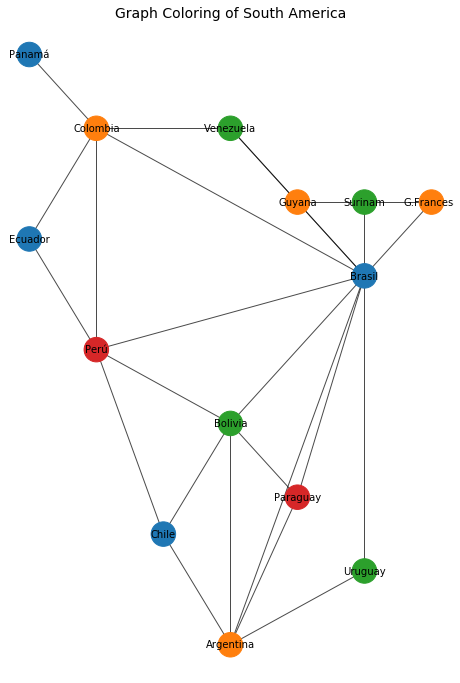

In [75]:
# Nodes labels
node_colors = []
for n in upg.nodes():
    node_colors.append(vtx_colors[n])

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 12]
nx.draw_networkx_nodes(upg, pos, nodelist=upg.nodes(), node_color=node_colors, node_size=600, alpha=1)
nx.draw_networkx_edges(upg, pos, edgelist=upg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_labels(upg, pos, nodes_name, font_size=10, font_color='black')
plt.title('Graph Coloring of South America', fontsize=14)
plt.axis('off')
plt.show()

## Reference

<a name='link_one' href='https://networkx.github.io/' target='_blank' >[1]</a> GitHub - NetworkX.  
<a name='link_two' href='https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)' target='_blank' >[2]</a> Wikipedia - Graphs.   
<a name='link_three' href='https://en.wikipedia.org/wiki/Graph_traversal' target='_blank' >[3]</a> Wikipedia - Graph traversal.  
<a name='link_four' href='https://en.wikipedia.org/wiki/Minimum_spanning_tree' target='_blank' >[4]</a> Wikipedia - Minimum spanning tree.  
<a name='link_five' href='https://en.wikipedia.org/wiki/Eulerian_path' target='_blank' >[5]</a> Wikipedia - Eulerian path.  
<a name='link_six' href='https://en.wikipedia.org/wiki/Directed_graph' target='_blank' >[6]</a> Wikipedia - Directed graph.  
<a name='link_seven' href='https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm' target='_blank' >[7]</a> Wikipedia - Dijkstra's algorithm.  
<a name='link_eight' href='https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm' target='_blank' >[8]</a> Wikipedia - All-Pairs Shortest Path.  
<a name='link_nine' href='https://en.wikipedia.org/wiki/Graph_coloring' target='_blank' >[9]</a> Wikipedia - Graph coloring.  
<a name='link_ten' href='https://en.wikipedia.org/wiki/Four_color_theorem' target='_blank' >[10]</a> Wikipedia - Four color theorem.  

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>